In [31]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

### 1. Frequent Category Imputation

In [32]:
# Reading the data in the dataframe
df = pd.read_csv('Loan.csv', usecols = ['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

BsmtQual FireplaceQu GarageType  SalePrice
0       Gd         NaN     Attchd     208500
1       Gd          TA     Attchd     181500
2       Gd          TA     Attchd     223500
3       TA          Gd     Detchd     140000
4       Gd          TA     Attchd     250000

In [33]:
# Finding the percentage of the missing values
print(f"Percentage of Missing values: \n {df.isnull().mean()*100}%")

Percentage of Missing values: 
 BsmtQual        2.534247
FireplaceQu    47.260274
GarageType      5.547945
SalePrice       0.000000
dtype: float64%


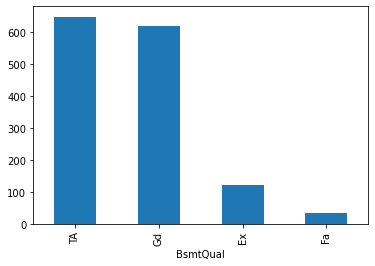

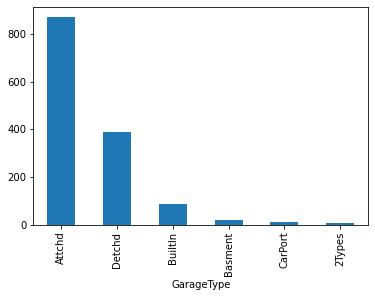

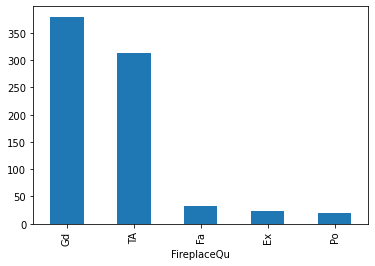

In [34]:
# Calculating the frequency of the features with missing values and plotting the count
df.groupby('BsmtQual')['BsmtQual'].count().sort_values(ascending = False).plot.bar()
plt.show()

df.groupby('GarageType')['GarageType'].count().sort_values(ascending = False).plot.bar()
plt.show()

df.groupby('FireplaceQu')['FireplaceQu'].count().sort_values(ascending = False).plot.bar()
plt.show()

In [35]:
# Create a function to impute missing values with most frequent value

def impute_nan(df, column):
    most_frequent_category = df[column].value_counts().index[0]
    df[column] = df[column].fillna(most_frequent_category)

# Calling the Impute function for all the missing columns
for i in ['BsmtQual','GarageType','FireplaceQu']:
    impute_nan(df,i)
    
df.head()

BsmtQual FireplaceQu GarageType  SalePrice
0       Gd          Gd     Attchd     208500
1       Gd          TA     Attchd     181500
2       Gd          TA     Attchd     223500
3       TA          Gd     Detchd     140000
4       Gd          TA     Attchd     250000

#### Advantage:
##### 1. Easy and Faster to implement

#### Disadvantge:
##### 1. Since we are using most frequent labels it may use them in an over-represented way for many missing values
##### 2. Distorts the relationship between of most frequent label

### 2. Using another feature to capture the NaN values

In [36]:
# Reading the data in the dataframe
df = pd.read_csv('Loan.csv', usecols = ['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

BsmtQual FireplaceQu GarageType  SalePrice
0       Gd         NaN     Attchd     208500
1       Gd          TA     Attchd     181500
2       Gd          TA     Attchd     223500
3       TA          Gd     Detchd     140000
4       Gd          TA     Attchd     250000

In [37]:
# Creating another feature for Missing values
df['BsmtQual'+"_Nan"] = np.where(df['BsmtQual'].isnull(), 1, 0)

df.head()

BsmtQual FireplaceQu GarageType  SalePrice  BsmtQual_Nan
0       Gd         NaN     Attchd     208500             0
1       Gd          TA     Attchd     181500             0
2       Gd          TA     Attchd     223500             0
3       TA          Gd     Detchd     140000             0
4       Gd          TA     Attchd     250000             0

In [38]:
# Replace the missing values with NaN where our missing value details and importance is captured in our new column
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

df.head()

BsmtQual FireplaceQu GarageType  SalePrice  BsmtQual_Nan
0       Gd         NaN     Attchd     208500             0
1       Gd          TA     Attchd     181500             0
2       Gd          TA     Attchd     223500             0
3       TA          Gd     Detchd     140000             0
4       Gd          TA     Attchd     250000             0

#### Another segmentation with above is create a separate feature with all NaN values and this is usually done with features having huge missing values

In [39]:
# Create a function to to capture the new variable with NaN values

def impute_nan(df, column):
    df[column+"_new_feature"] = np.where(df[column].isnull(), "Missing", df[column])

# Calling the Impute function for all the missing columns
for i in ['BsmtQual','GarageType','FireplaceQu']:
    impute_nan(df,i)
    
df.head()

BsmtQual FireplaceQu GarageType  SalePrice  BsmtQual_Nan  \
0       Gd         NaN     Attchd     208500             0   
1       Gd          TA     Attchd     181500             0   
2       Gd          TA     Attchd     223500             0   
3       TA          Gd     Detchd     140000             0   
4       Gd          TA     Attchd     250000             0   

  BsmtQual_new_feature GarageType_new_feature FireplaceQu_new_feature  
0                   Gd                 Attchd                 Missing  
1                   Gd                 Attchd                      TA  
2                   Gd                 Attchd                      TA  
3                   TA                 Detchd                      Gd  
4                   Gd                 Attchd                      TA

In [40]:
# Dropping the converted columns as it won't be needing
df = df.drop(['BsmtQual','GarageType','FireplaceQu'], axis = 1)

df.head()

SalePrice  BsmtQual_Nan BsmtQual_new_feature GarageType_new_feature  \
0     208500             0                   Gd                 Attchd   
1     181500             0                   Gd                 Attchd   
2     223500             0                   Gd                 Attchd   
3     140000             0                   TA                 Detchd   
4     250000             0                   Gd                 Attchd   

  FireplaceQu_new_feature  
0                 Missing  
1                      TA  
2                      TA  
3                      Gd  
4                      TA